Task: Predict Rainfall in Australia

Dataset: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

Algorithm: Random Forest Classifier

How to Run:



In [ ]:
import numpy as np #importing numpy with name np
import pandas as pd #importing pandas with name pd

In [ ]:
# Drop unused columns and columns and rows containing 'NA'

df = pd.read_csv("/content/weatherAUS.csv") #assigning data to the csv file
df.drop(['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], inplace=True, axis=1) #dropping columns that contain all NA
df = df.replace('NA', np.nan).dropna() #dropping any row that contains an NA in one of its elements
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# Reformat Date column from 'yyyy-mm-dd' to 'mm-dd'

for date in df['Date']:
  date = date[5:]

  # if len(date) != 5:
  #   raise Exception("Date not acceptable")

In [ ]:
# convert all text in data to numeric value

text_columns = df.select_dtypes(include=[object]).columns
print('text_columns: ', text_columns)

for col in text_columns:
  unique_vals = df[col].unique()
  num = 0
  for val in unique_vals:
    df[col].replace(val, num, inplace=True)
    num += 1

text_columns:  Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [ ]:
# print name of data type of each column to verify numeric values

for col in df.columns:
  print('column name: \t', col)
  print('data type: \t', df[col].dtypes)
  print('\n')

column name: 	 Date
data type: 	 int64


column name: 	 Location
data type: 	 int64


column name: 	 MinTemp
data type: 	 float64


column name: 	 MaxTemp
data type: 	 float64


column name: 	 Rainfall
data type: 	 float64


column name: 	 WindGustDir
data type: 	 int64


column name: 	 WindGustSpeed
data type: 	 float64


column name: 	 WindDir9am
data type: 	 int64


column name: 	 WindDir3pm
data type: 	 int64


column name: 	 WindSpeed9am
data type: 	 float64


column name: 	 WindSpeed3pm
data type: 	 float64


column name: 	 Humidity9am
data type: 	 float64


column name: 	 Humidity3pm
data type: 	 float64


column name: 	 Pressure9am
data type: 	 float64


column name: 	 Pressure3pm
data type: 	 float64


column name: 	 Temp9am
data type: 	 float64


column name: 	 Temp3pm
data type: 	 float64


column name: 	 RainToday
data type: 	 int64


column name: 	 RainTomorrow
data type: 	 int64




In [ ]:
#creates x and y
y = df['RainTomorrow']
X = df.drop(columns=['RainTomorrow'], axis=1)
# verify the output
print("X.shape:\t", X.shape)
print("Y.shape:\t", y.shape)

X.shape:	 (112925, 18)
Y.shape:	 (112925,)


In [ ]:
from sklearn.model_selection import train_test_split

# train:test split of 80:20
# random_state ensures consistent split on each instance
# stratify forces equal representation of "yes" and "no" in y columns

# Without stratification
normal_split = train_test_split(X, y, test_size=0.20, random_state=1)

print("Normal X_train.shape:\t\t", normal_split[0].shape, "\nNormal X_test.shape:\t\t", normal_split[1].shape)


# With stratification
stratified_split = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

print("\nStratified X_train.shape:\t", stratified_split[0].shape, "\nStratified X_test.shape:\t", stratified_split[1].shape)

#creating a ratio of no's to yes' to measure accuracy of the split
y_counts = y.value_counts()
norm_counts = normal_split[3].value_counts()
strat_counts = stratified_split[3].value_counts()
print(f"\ny counts: \n{y_counts} \nNo:Yes ratio: \n{y_counts[1]/sum(y_counts)}")
print(f"\nnormal_split counts: \n{norm_counts} \nNo:Yes ratio: \n{norm_counts[1]/sum(norm_counts)}")
print(f"\nstratified_split counts: \n{strat_counts} \nNo:Yes ratio: \n{strat_counts[1]/sum(strat_counts)}")
#after printouts, we chose the stratified split because it is a tad bit more accurate than a normal split

Normal X_train.shape:		 (90340, 18) 
Normal X_test.shape:		 (22585, 18)

Stratified X_train.shape:	 (90340, 18) 
Stratified X_test.shape:	 (22585, 18)

y counts: 
0    87906
1    25019
Name: RainTomorrow, dtype: int64 
No:Yes ratio: 
0.2215541288465796

normal_split counts: 
0    17520
1     5065
Name: RainTomorrow, dtype: int64 
No:Yes ratio: 
0.22426389196369273

stratified_split counts: 
0    17581
1     5004
Name: RainTomorrow, dtype: int64 
No:Yes ratio: 
0.22156298428160284


Feature Scaling Not Needed

It's noticeable that most columns have unnormalized data. Though, this shouldn't be a problem for a randrom forest.

"CART, Random Forests, Gradient Boosted Decision Trees. These algorithms utilize rules (series of inequalities) and do not require normalization."
-- https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

Random Forest Classifier Design:

Random Forests are designed to work with tabular data. Feature scaling is not necessary for an RF model. 

In [ ]:
# A few things to make testing and comparing designs easy
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix


class RFC_model:
  def __init__(self, name, model):
    self.name = name
    self.model = model
    self.trained_model = None
    self.y_pred = None
    self.y_test = None
    self.metrics = {"Accuracy": None,
                   "Precision": None,
                   "F1": None,
                   "Recall": None,
                   "Confusion": None}


  def train_test_model(self, X_train, X_test, y_train):
    self.trained_model = self.model.fit(X_train, y_train)
    self.y_pred = self.model.predict(X_test)

    return self.y_pred


  def score_model(self, y_test):
    if self.y_pred is None: return

    y1 = y_test
    y2 = self.y_pred
    self.metrics.update({"Accuracy": accuracy_score(y1, y2),
              "Precision": precision_score(y1, y2),
              "F1": f1_score(y1, y2),
              "Recall": recall_score(y1, y2),
              "Confusion": confusion_matrix(y1, y2)})
    
    return self.metrics


  def get_all(self):
    contents = (self.name, self.model, self.trained_model, 
                self.y_pred, self.y_test, self.metrics)
    return contents

In [ ]:
# Create a few versions of a Random Forest 
# Two sets: one for each type of data split
from sklearn.ensemble import RandomForestClassifier

number_of_trees = [2, 5, 10, 20, 50, 100, 150, 200, 250] # 8 different versions of the model to run and measure
models = []
  

for i, n in enumerate(number_of_trees):
  model = RandomForestClassifier(n_estimators=n, max_depth=3, random_state=0)
  models.append(RFC_model(f"model{i}" , model))
  print(f"model{i}")

model0
model1
model2
model3
model4
model5
model6
model7
model8


In [ ]:
X_train, X_test, y_train, y_test = stratified_split
print("Models(stratified split): ")
for model in models:
  model.train_test_model(X_train, X_test, y_train)
  model.score_model(y_test)
  print(model.metrics)
  # print(model.metrics[Accuracy])
# for model in models:
#   y_pred = train_test_model(model, X_train, y_train, X_test)
#   scores = score_model(y_test, y_pred)
  # print_scores(scores)
  

Models(stratified split): 
{'Accuracy': 0.8240867832632278, 'Precision': 0.6989579313006561, 'F1': 0.4768926925608953, 'Recall': 0.36191047162270185, 'Confusion': array([[16801,   780],
       [ 3193,  1811]])}
{'Accuracy': 0.823732565862298, 'Precision': 0.8109422492401216, 'F1': 0.40126334787186047, 'Recall': 0.2665867306155076, 'Confusion': array([[17270,   311],
       [ 3670,  1334]])}
{'Accuracy': 0.8269647996457826, 'Precision': 0.7830578512396694, 'F1': 0.43688760806916427, 'Recall': 0.3029576338928857, 'Confusion': array([[17161,   420],
       [ 3488,  1516]])}
{'Accuracy': 0.8322337834846136, 'Precision': 0.7696404793608522, 'F1': 0.4778834229020256, 'Recall': 0.34652278177458035, 'Confusion': array([[17062,   519],
       [ 3270,  1734]])}
{'Accuracy': 0.8283816692495019, 'Precision': 0.783702213279678, 'F1': 0.4456521739130435, 'Recall': 0.31135091926458835, 'Confusion': array([[17151,   430],
       [ 3446,  1558]])}
{'Accuracy': 0.8301970334292672, 'Precision': 0.8039521

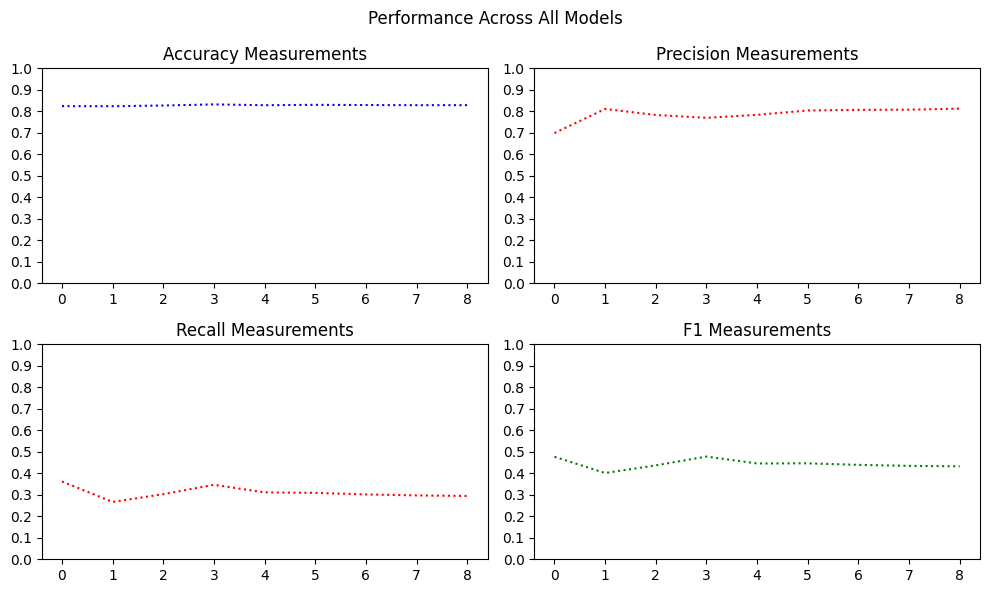

In [ ]:
import matplotlib.pyplot as plt

# Add labels to the plot
class_names = [2, 5, 10, 20, 50, 100, 150, 200, 250]
x_ticks = np.arange(len(class_names))
y_ticks = np.arange(0,1.1,0.1)

# defining y-points for each mesurement
ypointsA = [model.metrics['Accuracy'] for model in models]
ypointsP = [model.metrics['Precision'] for model in models]
ypointsR = [model.metrics['Recall'] for model in models]
ypointsF1 = [model.metrics['F1'] for model in models]

# defining the figure
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, tight_layout=False, figsize=(10,6))
fig.suptitle('Performance Across All Models') # super title

# accuracy plot
ax0.set_title('Accuracy Measurements')
ax0.plot(x_ticks, ypointsA, linestyle = 'dotted', color = 'blue')
ax0.set_yticks(y_ticks)

# precision plot
ax1.set_title('Precision Measurements')
ax1.plot(x_ticks, ypointsP, linestyle = 'dotted', color = 'red')
ax1.set_yticks(y_ticks)

# recall plot
ax2.set_title('Recall Measurements')
ax2.plot(x_ticks, ypointsR, linestyle = 'dotted', color = 'red')
ax2.set_yticks(y_ticks)

# f1 plot
ax3.set_title('F1 Measurements')
ax3.plot(x_ticks, ypointsF1, linestyle = 'dotted', color = 'green')
ax3.set_yticks(y_ticks)

plt.show()